# COGS 108 - Assignment 2: Data Exploration

# Important

- Rename this file to 'A2_A########.ipynb' (filled in with your student ID) before you submit it. Submit it to TritonED.
- This assignment has hidden tests: tests that are not visible here, but that will be run on your submitted. 
    - This means passing all the tests you can see in the notebook here does not guarantee you have the right answer!

## Part 1 - Data Wrangling

You are provided with two data files:
- age_steps.csv
- name_income_id.json

In [1]:
# Imports
#  Note: these are all the imports you need! Do not import any other functions / packages
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1a) Load the csv file into a pandas dataframe. Call it 'df_steps'.
# YOUR CODE HERE
df_steps = pd.read_csv('../A2/age_steps.csv')

In [3]:
assert isinstance(df_steps, pd.DataFrame)


In [4]:
# 1b) Load the json file into a (different) pandas dataframe. Call it 'df_income'.
# YOUR CODE HERE
df_income = pd.read_json('../A2/name_income_id.json')

In [5]:
assert isinstance(df_income, pd.DataFrame)


In [6]:
# 1c) Drop the 'first_name' and 'last_name' columns from the df_income data frame.
# pandas.Series.drop API
df_income = df_income.drop(['first_name', 'last_name'], axis=1)

In [7]:
assert 'first_name' not in df_income.columns
assert 'last_name' not in df_income.columns

In [8]:
# 1d) Combine the two dataframes into one combined, new dataframe. Call it 'df'.
#  Note: For this part, it doesn't in which order you merge the dataframes.

#pd.concat([df_steps, df_income], axis=1) this will just append one dataframe
#to the next, so there would be two 'id' columns
#merge will merge the 2 dataframes on 'id' because it is the common column
#i.e if the id is in both it merges values, otherwise it's left out

df = pd.merge(df_income, df_steps)
#df.shape

In [9]:
assert isinstance(df, pd.DataFrame)
assert set(df.columns) == set(['id', 'income', 'age', 'steps'])

In [10]:
# 1e) Re-Order the Column ID's to be [id, age, steps, income]

df = df[['id', 'age', 'steps', 'income']]

In [11]:
assert list(df.columns) == ['id', 'age', 'steps', 'income']

## Part 2 - Data Cleaning

In [12]:
# 2a) First check how many missing data (NaNs) there are in the income data.
#  Save this number into a variable called 'n_nan'

# df.isnull() detects missing values in data frame, and returns an array indicating whether
#or not an object is null. False=not null, True=null
# df.sum(axis=1) will count the number of 'True's (NaNs) per row. I.e. person/row 9
#has 1 missing data in 'income' so in the array this returns, person/row 9 has
#a 1 in the column next to it.
# df.sum(axis=0) will sum the values that the previous sum calculated for each
#person/row. The key difference is that axis=0 is summing along the columns.
#n_nan = df.isnull().sum(axis=1).sum(axis=0)

n_nan = df.isnull().sum(axis=1).sum(axis=0)
#print(n_nan)
df.shape

(1000, 4)

In [13]:
assert(n_nan)


In [14]:
# 2b) Remove all rows from df that have missing data (that have NaN values)
#pandas.DataFrame.dropna
df.dropna(inplace=True)
df.shape

(988, 4)

In [15]:
assert(sum(np.isnan(df['income'])) == 0)

## Data Visualization

- You will be making histograms, check out this example on how to do that.
    - http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html
    - This example has more than you need: 
        - Titles, axis labels, etc are optional (but recommended)
        - You do no need to add a 'best fit' line.
- Everywhere that we ask you to create a plot, make sure to leave the 'plt.gcf()' line at the end of the cell. 
    - This is used to get a figure handle in order to programmatically evaluate your plots.
- For all your histograms, use 25 bins

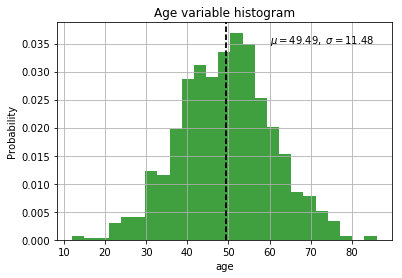

In [16]:
# 2c) Plot the histogram of the age variable

#age mean and age standard deviation
#age_mu = df['age'].mean()
#age_sigma = df['age'].std()

#the histogram
n, bins, patches = plt.hist(df['age'], 25, normed=1, facecolor='green', alpha=.75)
plt.grid(True)

#Labeling
plt.xlabel('age')
plt.ylabel('Probability')
plt.title('Age variable histogram')
plt.text(60, .035, r'$\mu=49.49,\ \sigma=11.48$', size='medium')

#Mean line
plt.axvline(df['age'].mean(), color='k', linestyle='dashed', linewidth=2, alpha=.90)


#plt.show()

f1 = plt.gcf()

In [17]:
assert f1.gca().has_data()

16432.26113360324 5417.182135612828


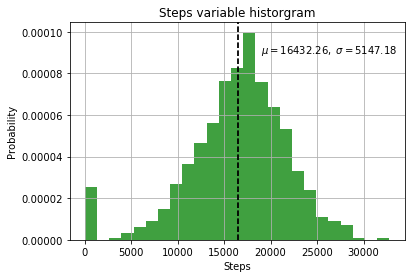

In [18]:
# 2d) Plot the histogram of the steps variable

#the histogram
n, bins, patches = plt.hist(df['steps'], 25, normed=1, facecolor='green', alpha=.75)
plt.grid(True)

print(df['steps'].mean(), df['steps'].std())

#labeling
plt.xlabel('Steps')
plt.ylabel('Probability')
plt.title('Steps variable historgram')
plt.text(19000, .00009, r'$\mu=16432.26,\ \sigma=5147.18$', size='medium')

#mean line
plt.axvline(df['steps'].mean(), color='k', linestyle='dashed', linewidth=2, alpha=.90)

f2 = plt.gcf()

In [19]:
assert f2.gca().has_data()

### M1 - What do you notice about steps data from the plot?

It looks like there is a giant amount of 0 steps

In [20]:
# 2e) Check how many -1 values there are in steps. Save the number into a variable called 'n_neg'

#This will give a plot counting the number of 'False' (i.e values not -1) and number of 'True' (i.e. == -1)
#print((df['steps'] == -1).value_counts())

n_neg = (df['steps'] == -1).sum()
#print(n_neg)
df.shape

(988, 4)

In [21]:
assert(n_neg)


In [22]:
# 2f) Remove all rows where steps is equal to -1
# Can do this way, but df.query is another library which can be faster
#df = df[df['steps'] != -1]
#Another way: df[df.steps != -1]
#df = df[df.steps != -1]
#df.drop(df[df.steps == -1].index, inplace=True)

#Query might not work
#df.query
df.query('steps != -1', inplace=True)
df.shape

(955, 4)

In [23]:
assert -1 not in df['steps']
assert sum(df['steps'].isin([-1])) == 0

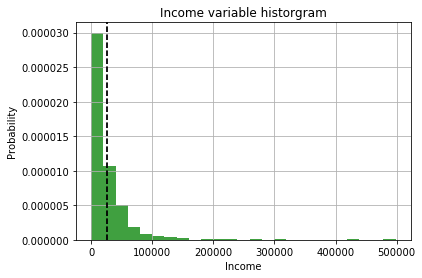

In [24]:
# 2g) Plot the histogram of the income variable

#the histogram
n, bins, patches = plt.hist(df['income'], 25, normed=1, facecolor='green', alpha=.75)
plt.grid(True)

#print(df['income'].mean(), df['income'].std())

#labeling
plt.xlabel('Income')
plt.ylabel('Probability')
plt.title('Income variable historgram')
#plt.text(95000, .000027, r'$\mu=26474.83,\ \sigma=37501.09$', size='medium')

#mean line
plt.axvline(df['income'].mean(), color='k', linestyle='dashed', linewidth=2, alpha=.90)


f3 = plt.gcf()

In [25]:
assert f3.gca().has_data()

### M2 - What do you notice about the income data from the plot?

There seems to be a lot of zero data.

In [26]:
# 2h) For all rows in which income is equal to zero, recode income to be equal to 1
#df.replace
#print((df['income'] == 0).sum())
df['income'] = df['income'].replace(0, 1)

In [27]:
assert sum(df['income'] == 0.) == 0

In [28]:
# 2i) Transform income using a log10 transform

df['income'] = np.log10(df['income'])
df.shape

(955, 4)

In [29]:
assert np.isclose(min(df['income']), 0.0, 0.1)
assert np.isclose(max(df['income']), 5.69, 0.1)

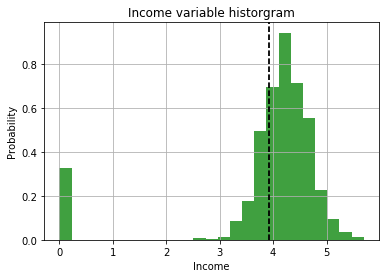

In [30]:
# 2j) Replot the histogram for income data after the data transformation

#the histogram
n, bins, patches = plt.hist(df['income'], 25, normed=1, facecolor='green', alpha=.75)
plt.grid(True)

#print(df['income'].mean(), df['income'].std())

#labeling
plt.xlabel('Income')
plt.ylabel('Probability')
plt.title('Income variable historgram')

#mean line
plt.axvline(df['income'].mean(), color='k', linestyle='dashed', linewidth=2, alpha=.90)

f4 = plt.gcf()

In [31]:
assert f4.gca().has_data()

### M3 - What do you notice about the income data after you replot it?

There is a more even distribution amongst the values that are not 0, and
the values that were, are still there. It also makes the graph a lot easier to view.

In [32]:
# 2k) Remove all rows where age is less than 18
#df.query way
df.query('age > 18', inplace=True)

#another way
#df.drop(df[df.age < 18].index, inplace=True)
#df.drop(df['age']<18, inplace=True)
df.shape

(951, 4)

In [33]:
assert min(df['age']) >= 18

### Removing outliers
Next, we're going to remove all rows where the data for the steps column exceeds +/- 3 standard deviations above or below the mean.

In [34]:
# 2l) For the steps data: 
# - Calculate what three times the standard deviation is, and save it to variables called 'std3'. 
# - Using 'std3', create new variables, called std_max' and 'std_min'.
#    These will store our cut-off values: 3 std above and below the mean respectively. 

std3 = 3 * df['steps'].std(ddof=0)
mean = df['steps'].mean()

std_min = mean - std3

std_max = mean + std3



In [35]:
assert(std3)
assert(std_min)
assert(std_max)


In [36]:
# 2m) Now use these values to remove any rows with steps data above or below these thresholds

df = df[df.steps > std_min]
df = df[df.steps < std_max]
#df.drop(df[df.steps < std_min].index, inplace=True)
#df.drop(df[df.steps > std_max].index, inplace=True)

df.shape


(949, 4)

In [37]:
assert min(df['steps']) > 3446
assert max(df['steps']) < 30594

In [38]:
# Check that the following test passes - if it fails, you have the wrong amount of data left. 
#  If so, go back and try to fix your cleaning steps, else your analysis answers will be wrong.
assert df.shape == (879, 4)

AssertionError: 

## Part 3 - Basic Analyses

In [39]:
# 3a) Calculate the pairwise correlations between all variables. 
#  Notes: do this with a pandas function. Keep all columns (including ID).



NotImplementedError: 

In [ ]:
assert isinstance(corrs, pd.DataFrame)
assert corrs.shape == (4, 4)

In [ ]:
# 3b) Plot the data using pandas scatter_matrix, saving it to output variable name 'fd'.
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
fd[0][0].axes.has_data()

# Part 4 - Predictions

Notes:
- Use the polyfit function from np, in the way that we did in 'SectionMaterials/02-DataAnalysis
- The predictions should be in dollars (so you'll have to 'un-log' the prediction)

In [ ]:
# 4a) Use polyfit to fit a 1-degree linear model, predicting income from age.
#  Call the output parameters 'a1' and 'b1'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(a1)
assert(b1)


In [ ]:
# 4b) Use the model parameters from 4a to predict the income of a 75 year old. Call your prediction 'pred1'.
#  Note: Convert the prediction to be in real dollars (not log dollars)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(pred1)


In [ ]:
# 4c) Use polyfit to fit a 1-degree linear model, predicting income from steps. 
#  Call the output parameters 'a2' and 'b2'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(a2)
assert(b2)


In [ ]:
# 4d) Predict the income of someone who took 20,000 steps. Call your prediction 'pred2'.
#  Note: Convert the prediction to be in real dollars (not log dollars)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(pred2)


In [ ]:
# 4e) Based on your analysis in Part 3, which model do you think is more likely to have made a good prediction?
#  Create a variable called 'better_model', and set it equal to 'age' or 'steps', whichever your answer is.
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert better_model

### M4 - Why do you think (whichever model you answered) is better?

YOUR ANSWER HERE

## Done! Upload this notebook to TritonED